In [1]:
from sogym.env import sogym
from sogym.utils import FigureRecorderCallback
import numpy as np
import stable_baselines3
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import VecNormalize, SubprocVecEnv
import torch
from stable_baselines3 import PPO
%load_ext autoreload
%autoreload 2

print('SB3 version:', stable_baselines3.__version__)
# Let's make the code device agnostic:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using device:', device)

/home/thomas/anaconda3/envs/SB3_update/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


SB3 version: 1.7.0
Using device: cuda


---
### Environment test and visualization:

In [2]:
from stable_baselines3.common.env_checker import check_env
# It will check your custom environment and output additional warnings if needed
check_env(sogym(mode='train',observation_type='dense'))

In [3]:
# Let's test the environment using the check_env util from SB3:
train_env = sogym(mode='train',observation_type='dense',vol_constraint_type='hard')
eval_env = sogym(mode='test',observation_type='dense',vol_constraint_type='hard')
obs = train_env.reset()

In [4]:
from sogym.mmc_optim import *
#run_mmc(train_env.conditions,train_env.nelx,train_env.nely,train_env.dx,train_env.dy,plotting='contour')

In [5]:
# Let's write a function to generate multiple MMC solutions:
# The function should run in parallel using the multiprocessing module:
# Each thread should run an instance of run_mmc and write the results to a json file in the 
import json
import random
import copy
def generate_mmc_solutions(key):
    env = sogym(mode='train',observation_type='dense',vol_constraint_type='soft',seed=key)
    obs = env.reset()
    xval, f0val, num_iter =  run_mmc(env.conditions,env.nelx,env.nely,env.dx,env.dy,plotting='nothing',verbose=0)
    #out_conditions = train_env.conditions.copy()
    out_conditions = env.conditions.copy()

    # train_env.conditions contains numpy arrays that I cant save in the json file. I need to convert them to lists
    for dict_key in out_conditions.keys():
        if type(out_conditions[dict_key]) is np.ndarray:
            out_conditions[dict_key] = out_conditions[dict_key].tolist()
            # convert also the internals of the key in case I have arrays of arrays:
        if  type(out_conditions[dict_key]) is list and type(out_conditions[dict_key][0]) is np.ndarray:
            out_conditions[dict_key] = [float(x[0])for x in out_conditions[dict_key]]
        # Convert all of the int64 to floats:
    # Generate a dictionary to save the json with the following keys:
    # 'conditions':out_conditions, a dictionary with the conditions
    # 'compliance':f0val.tolist(), a list with
    save_dict={
        'conditions':out_conditions,
        'compliance':f0val.tolist(),
        'num_iter':float(num_iter),
        'xval':xval.tolist()
    }
    with open('dataset/raw_data_v2/data_{}.json'.format(key), 'w') as fp:
        json.dump(save_dict, fp)

In [ ]:
generate_mmc_solutions(1)

In [ ]:
import multiprocessing as mp
import random
import tqdm

#nbrAvailCores = mp.cpu_count()
nbrAvailCores=32
pool = mp.Pool(processes=nbrAvailCores)
#resultsHandle = [pool.apply_async(main_gen, args=(z,)) for z in range(0, len(BC_saved))]
resultsHandle = [pool.apply_async(generate_mmc_solutions, args=(z,)) for z in range(25041,40000)]

results = [r.get() for r in tqdm.tqdm(resultsHandle)]
pool.close()

  0%|                                                 | 0/14959 [00:00<?, ?it/s]/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


  0%|                                   | 1/14959 [15:26<3851:37:58, 926.99s/it]

/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


  0%|                                   | 5/14959 [37:59<1768:58:09, 425.86s/it]

  0%|                                   | 13/14959 [40:34<572:04:42, 137.79s/it]

/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


  0%|                                   | 19/14959 [45:57<421:40:57, 101.61s/it]

/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


  0%|                                   | 25/14959 [57:33<444:16:05, 107.10s/it]

  0%|▏                                 | 57/14959 [1:04:32<153:46:14, 37.15s/it]

  1%|▏                                  | 78/14959 [1:04:42<91:15:07, 22.08s/it]

/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:187: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


/home/thomas/Documents/GitHub/so_gym/sogym/mmc_optim.py:158: RuntimeWarning: divide by zero encountered in log
  Phimax = np.maximum(-1e3,np.log(np.sum(temp,1))/lmd)                        # global TDF using K-S aggregation


  1%|▏                                 | 79/14959 [1:18:35<182:23:21, 44.13s/it]

  1%|▏                                 | 97/14959 [1:23:16<133:46:22, 32.40s/it]

  1%|▏                                | 104/14959 [1:26:47<131:56:33, 31.98s/it]

  1%|▎                                | 115/14959 [1:29:41<112:11:24, 27.21s/it]

  1%|▎                                | 118/14959 [1:30:01<103:27:19, 25.10s/it]

  1%|▎                                | 122/14959 [1:38:03<167:54:22, 40.74s/it]

  1%|▎                                | 139/14959 [1:47:25<151:58:27, 36.92s/it]

  1%|▎                                | 150/14959 [1:53:29<146:51:54, 35.70s/it]

  1%|▎                                | 157/14959 [2:00:14<167:07:19, 40.65s/it]

  1%|▎                                | 161/14959 [2:03:13<169:41:41, 41.28s/it]

  1%|▍                                | 175/14959 [2:05:11<110:54:00, 27.00s/it]

  1%|▍                                | 177/14959 [2:08:10<131:43:45, 32.08s/it]

  1%|▍                                | 193/14959 [2:12:31<100:24:21, 24.48s/it]

  1%|▍                                 | 199/14959 [2:13:08<84:59:44, 20.73s/it]

  1%|▍                                 | 206/14959 [2:15:10<81:22:57, 19.86s/it]

  1%|▍                                 | 207/14959 [2:16:38<95:14:40, 23.24s/it]

  1%|▍                                | 208/14959 [2:18:31<119:34:49, 29.18s/it]

  1%|▍                                | 213/14959 [2:26:50<212:14:59, 51.82s/it]

  1%|▍                                | 214/14959 [2:27:02<198:32:22, 48.47s/it]

  1%|▍                                | 218/14959 [2:34:44<287:17:55, 70.16s/it]

  1%|▍                                | 220/14959 [2:36:57<284:36:29, 69.52s/it]

  2%|▌                                | 237/14959 [2:52:15<240:07:54, 58.72s/it]

  2%|▌                                | 247/14959 [2:52:56<157:36:45, 38.57s/it]

  2%|▌                                | 261/14959 [2:54:57<105:33:59, 25.86s/it]

  2%|▌                                | 262/14959 [2:59:56<151:53:27, 37.21s/it]

  2%|▌                                | 263/14959 [3:04:19<203:25:33, 49.83s/it]

  2%|▋                                 | 284/14959 [3:05:04<81:18:55, 19.95s/it]

  2%|▋                                | 294/14959 [3:15:28<132:58:38, 32.64s/it]

  2%|▋                                | 296/14959 [3:21:04<176:20:55, 43.30s/it]

  2%|▋                                | 305/14959 [3:26:49<169:29:50, 41.64s/it]

  2%|▋                                | 313/14959 [3:34:54<192:21:51, 47.28s/it]

  2%|▋                                | 316/14959 [3:39:26<216:41:17, 53.27s/it]

  2%|▋                                | 332/14959 [3:41:01<117:58:53, 29.04s/it]

  2%|▊                                 | 348/14959 [3:45:47<98:37:53, 24.30s/it]

  2%|▊                                | 354/14959 [3:49:48<110:29:31, 27.24s/it]

  2%|▊                                | 356/14959 [3:53:46<140:38:11, 34.67s/it]

  3%|▊                                 | 377/14959 [3:57:41<88:16:06, 21.79s/it]

  3%|▊                                 | 380/14959 [3:59:10<91:26:53, 22.58s/it]

  3%|▊                                | 382/14959 [4:13:16<233:09:47, 57.58s/it]

  3%|▉                                | 404/14959 [4:18:49<133:28:20, 33.01s/it]

  3%|▉                                | 409/14959 [4:20:25<124:35:32, 30.83s/it]

  3%|▉                                | 419/14959 [4:24:00<112:46:24, 27.92s/it]

  3%|▉                                 | 428/14959 [4:24:35<84:59:29, 21.06s/it]

  3%|▉                                | 434/14959 [4:32:32<135:23:15, 33.56s/it]

  3%|▉                                | 444/14959 [4:38:31<138:33:16, 34.36s/it]

  3%|▉                                | 447/14959 [4:39:40<132:39:46, 32.91s/it]

  3%|█                                 | 463/14959 [4:40:50<76:14:38, 18.93s/it]

  3%|█                                | 471/14959 [4:46:35<101:28:25, 25.21s/it]

  3%|█                                | 473/14959 [4:53:38<164:55:28, 40.99s/it]

In [ ]:
# Let's visualize the training environment on a random problem statement and visualize a 'successful' solution:
reward = 0.0
while reward==0.0:
    obs = train_env.reset()
    done = False
    while not done:
        action = train_env.action_space.sample()
        obs, reward, done, info = train_env.step(action)
print("Volume: ", train_env.volume)
print("Reward ",reward)

train_env.plot()

In [157]:
import cv2
img = (train_env.den.reshape((train_env.nely,train_env.nelx),order='F'))
# Threshold the image to create a binary image with dark pixels as 1s and light pixels as 0s
thresh = cv2.threshold(img,0.1, 255, cv2.THRESH_BINARY)[1]
thresh = np.array(thresh,dtype=np.uint8)

# Apply a connected component analysis to find the connected components in the image
output = cv2.connectedComponentsWithStats(thresh, connectivity=8)
# The first cell is the number of labels
num_labels = output[0]
# The second cell is the label matrix
labels = output[1]
# The third cell is the stat matrix
stats = output[2]
# The fourth cell is the centroid matrix
centroids = output[3]


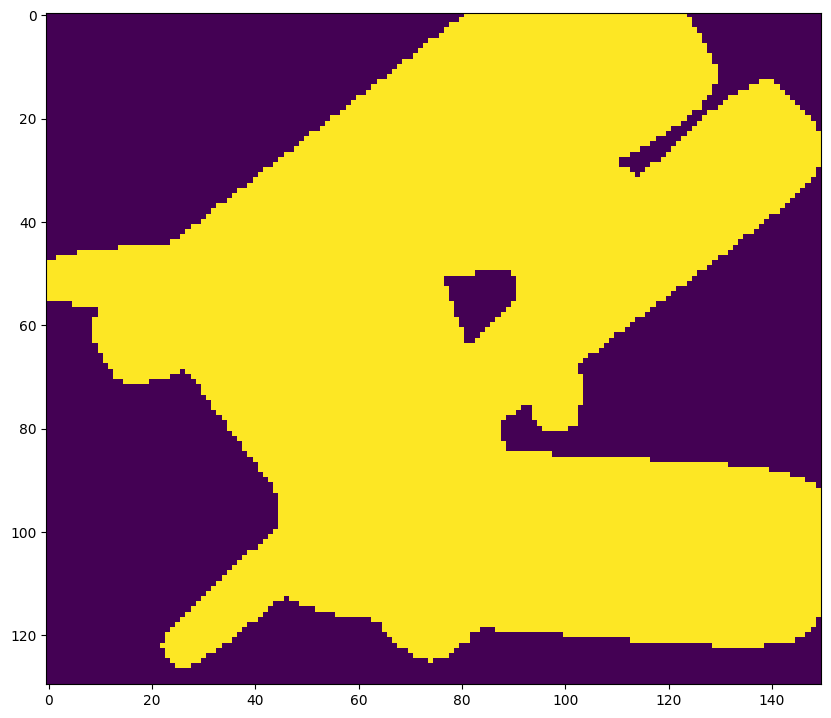

In [158]:
import matplotlib.pyplot as plt
plt.imshow(labels)

In [146]:
train_env.check_connec()

True

In [136]:
if train_env.conditions['selected_boundary']==0.25: # Right boundary
    label_support = labels[int(train_env.conditions['boundary_position']*train_env.nely):int(train_env.conditions['boundary_position']*train_env.nely)+int(train_env.conditions['boundary_length']*train_env.nely),-1]
    labels_load=[]
    for i in range(train_env.conditions['n_loads']):
    #labels of load:
        labels_load .append(labels[int(train_env.conditions['load_position'][i]*train_env.nely),0])

In [139]:
label_support

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int32)

Text(0.5, 0.5, 'y')

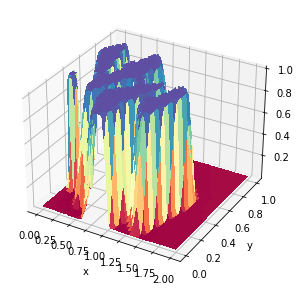

In [27]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

#surf = ax.plot_surface(train_env.x, train_env.y, train_env.Phi[:,5].reshape((train_env.nely+1,train_env.nelx+1),order='F'), cmap=cm.coolwarm,
 #                     linewidth=0, antialiased=False)

    
surf = ax.plot_surface(train_env.x, train_env.y, train_env.H.reshape((train_env.nely+1,train_env.nelx+1),order='F'), cmap=cm.Spectral,
                     linewidth=0, antialiased=False)
#name the xlabel x:
ax.set_xlabel('x')
#name the ylabel y:
ax.set_ylabel('y')
# Make data.
#train_env.Phi

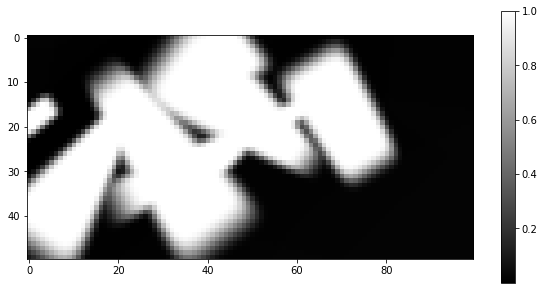

In [26]:
# Plot the density:
plt.imshow(train_env.den.reshape((train_env.nely,train_env.nelx),order='F'),cmap='gray')
plt.colorbar()

In [ ]:
import cv2

# Load grayscale image
img = (train_env.den.reshape((train_env.nely,train_env.nelx),order='F'))


# Threshold the image to create a binary image with dark pixels as 1s and light pixels as 0s
thresh = cv2.threshold(img,0.1, 255, cv2.THRESH_BINARY)[1]
thresh = np.array(thresh,dtype=np.uint8)

# Apply a connected component analysis to find the connected components in the image
output = cv2.connectedComponentsWithStats(thresh, connectivity=8)



(50, 100)


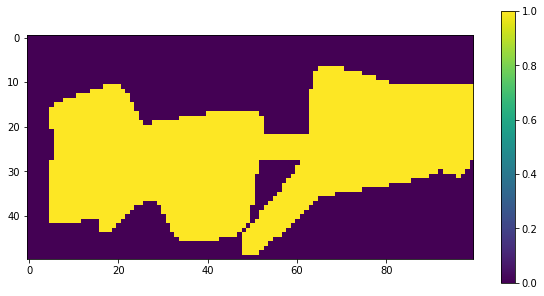

In [ ]:
# The first cell is the number of labels
num_labels = output[0]
# The second cell is the label matrix
labels = output[1]
# The third cell is the stat matrix
stats = output[2]
# The fourth cell is the centroid matrix
centroids = output[3]

print(labels.shape)
plt.imshow(labels)
plt.colorbar()

In [ ]:
# Let's say we want to know if the load and the support boundaries are connected:
#Relative y position of load
#Relative x position of load
 #Relative y position of support_1
#Relative x position of support_1
#Relative y position of support_2
 #Relative x position of support_2
#Volume fraction (between 0 and 1)
#magnitude of load in x 
#magnitude of load in y 
y_load = int(train_env.out_conditions[0]*(train_env.nely))
x_load = int(train_env.out_conditions[1]*(train_env.nelx))
y_support_1 = int(train_env.out_conditions[2]*(train_env.nely))
x_support_1 = int(train_env.out_conditions[3]*(train_env.nelx))
y_support_2 = int(train_env.out_conditions[4]*(train_env.nely))
x_support_2 = int(train_env.out_conditions[5]*(train_env.nelx))

#labels of support_1 and support_2
label_support_1 = labels[y_support_1,x_support_1:x_support_2]

#labels of load:
label_load = labels[y_load,x_load]
if label_load != 0:
    if label_load in label_support_1:
        print('connected')
else:
    print('not connected')

not connected


In [ ]:
label_support_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int32)

In [ ]:
# I want to index each 1 + 2 element of train_env.U:
U_x = train_env.U[0::2]
U_y = train_env.U[1::2]


(5151, 1)


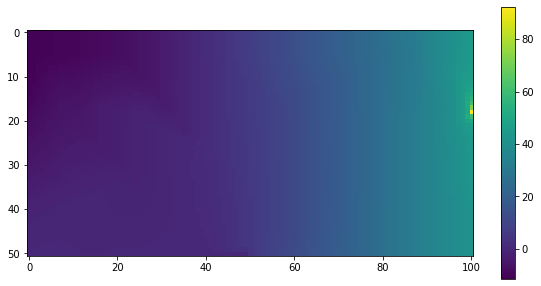

In [ ]:
import matplotlib.pyplot as plt
print(U_x.shape)
plt.imshow(U_y.reshape((train_env.nely+1,train_env.nelx+1),order='F'))
plt.colorbar()


In [ ]:
F_x.nonzero()

(array([5101]), array([0]))

(5151, 1)


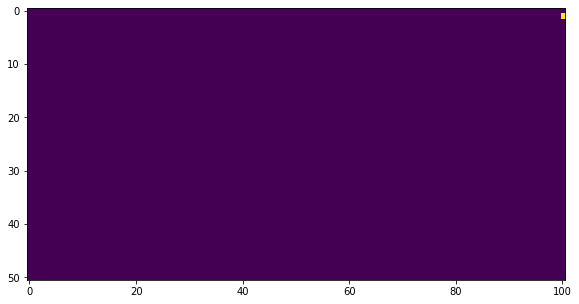

In [ ]:
#Convert train_env.F to a dense matrix:
F_x = train_env.F.toarray()[0::2]
F_y = train_env.F.toarray()[1::2]
print(F_x.shape)
plt.imshow(F_x.reshape((train_env.nely+1,train_env.nelx+1),order='F'))

In [ ]:
# How many elements of F_x are nonzero?
print(F_y.nonzero())

#F_x.reshape((train_env.nely+1,train_env.nelx+1),order='F').nonzero()

(array([5101]), array([0]))


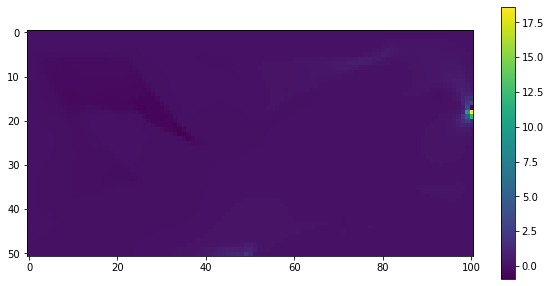

In [ ]:
# LEt's calculate the Von Mises stress from U_x and U_y:
# First, we need to calculate the strain:
# E_xx = dU_x/dx
# E_yy = dU_y/dy
# E_xy = 1/2(dU_x/dy + dU_y/dx)

E_xx = np.gradient(U_x.reshape((train_env.nely+1,train_env.nelx+1),order='F'),axis=1)
E_yy = np.gradient(U_y.reshape((train_env.nely+1,train_env.nelx+1),order='F'),axis=0)
E_xy = 0.5*(np.gradient(U_x.reshape((train_env.nely+1,train_env.nelx+1),order='F'),axis=0) + np.gradient(U_y.reshape((train_env.nely+1,train_env.nelx+1),order='F'),axis=1))

# Now, we can calculate the stress:
# sigma_xx = E_xx*E
# sigma_yy = E_yy*E
# sigma_xy = E_xy*E

plt.imshow(E_xy)
plt.colorbar()

Volume:  0.4979757553332994
Reward  0.0


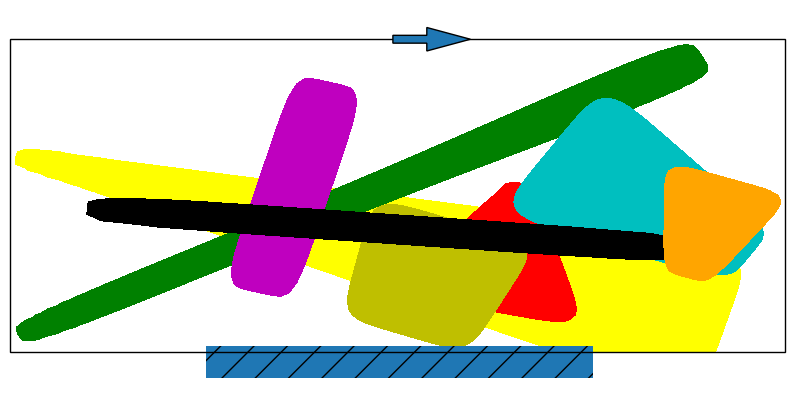

In [ ]:
# Let's visualize the eval environment:
obs = eval_env.reset()
done = False
while not done:
    action = eval_env.action_space.sample()
    obs, reward, done, info = eval_env.step(action)
print("Volume: ", eval_env.volume)
print("Reward ",reward)
eval_env.plot()

---
### Multiprocessing

In [2]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("huggingface/CodeBERTa-small-v1")
model = AutoModel.from_pretrained("huggingface/CodeBERTa-small-v1").to('cuda')
num_cpu = 6 # Number of processes to use
train_env = sogym(mode='train',observation_type='text_dict',vol_constraint_type = 'soft',model=model,tokenizer=tokenizer)
env= make_vec_env(lambda:train_env, n_envs=num_cpu,vec_env_cls=SubprocVecEnv)
env=VecNormalize(env,gamma=1.0)

eval_env = sogym(mode='train',observation_type='text_dict',vol_constraint_type='soft',model=model,tokenizer=tokenizer)
eval_env = make_vec_env(lambda:eval_env, n_envs=1,vec_env_cls=SubprocVecEnv)
eval_env =VecNormalize(eval_env,gamma=1.0)


Some weights of the model checkpoint at huggingface/CodeBERTa-small-v1 were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.decoder.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:
# Let's  test that an eval callback actually works:
from stable_baselines3.common.callbacks import EvalCallback, CallbackList

eval_callback = EvalCallback(eval_env,log_path='tb_logs',eval_freq=100,deterministic=True,render=False,verbose=0)
callback = CallbackList([eval_callback,
                         FigureRecorderCallback(check_freq=2*8*32)])

--- 
### Defining the model

In [4]:
from sogym.utils import ImageDictExtractor
policy_kwargs = dict(
    #features_extractor_class=ImageDictExtractor,
    net_arch=dict(pi=[512,512,512], vf=[512,512,512]),
               #optimizer_kwargs={"weight_decay": 1e-3},
)

In [5]:
model = PPO("MultiInputPolicy",
            env,
            #seed=42,
            #policy_kwargs = policy_kwargs,
            n_steps=512//num_cpu,#(2048*16)//32,  #def: 224
            batch_size=512,#2048*2, #def: 50*224
            verbose=0,
            n_epochs=3,
            vf_coef = 1.0,
            clip_range = 0.3,
            clip_range_vf = 10.0,
            #target_kl = 0.02,
            gamma=1.0,  #def: 1
            learning_rate=3e-4,
            ent_coef=3e-4,
            tensorboard_log="tb_logs",
            device='cuda'
            )


/home/thomas/anaconda3/envs/SB3_update/lib/python3.10/site-packages/stable_baselines3/ppo/ppo.py:145: UserWarning: You have specified a mini-batch size of 512, but because the `RolloutBuffer` is of size `n_steps * n_envs = 510`, after every 0 untruncated mini-batches, there will be a truncated mini-batch of size 510
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=85 and n_envs=6)
  warnings.warn(


--- 
### Training

In [6]:

model.learn(10000000,callback=callback,tb_log_name='test_v2_with_text')
#model.save('model_saved',)
#env.save('env_saved.pkl')

Process ForkServerProcess-4:
Process ForkServerProcess-2:
Process ForkServerProcess-6:
Process ForkServerProcess-5:
Process ForkServerProcess-1:
Process ForkServerProcess-3:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/thomas/anaconda3/envs/SB3_update/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/thomas/anaconda3/envs/SB3_update/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/thomas/anaconda3/envs/SB3_update/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/thomas/anaconda3/envs/SB3_update/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/thomas/anaconda3/envs/SB3_update/lib/python3.10/site-packa

EOFError: 

Process ForkServerProcess-7:
Traceback (most recent call last):
  File "/home/thomas/anaconda3/envs/SB3_update/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/thomas/anaconda3/envs/SB3_update/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/thomas/anaconda3/envs/SB3_update/lib/python3.10/site-packages/stable_baselines3/common/vec_env/subproc_vec_env.py", line 28, in _worker
    cmd, data = remote.recv()
  File "/home/thomas/anaconda3/envs/SB3_update/lib/python3.10/multiprocessing/connection.py", line 255, in recv
    buf = self._recv_bytes()
  File "/home/thomas/anaconda3/envs/SB3_update/lib/python3.10/multiprocessing/connection.py", line 419, in _recv_bytes
    buf = self._recv(4)
  File "/home/thomas/anaconda3/envs/SB3_update/lib/python3.10/multiprocessing/connection.py", line 384, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


In [61]:
train_env.

In [36]:
num_cpu = 32 # Number of processes to use
train_env = sogym(mode='train',observation_type='dense',vol_constraint_type= 'soft')
env= make_vec_env(lambda:train_env, n_envs=num_cpu,vec_env_cls=SubprocVecEnv)
env = VecNormalize.load('env_saved.pkl',env)

eval_env = sogym(mode='test',observation_type='dense',vol_constraint_type='soft')
eval_env = make_vec_env(lambda:eval_env, n_envs=1,vec_env_cls=SubprocVecEnv)
eval_env = VecNormalize.load('env_saved.pkl',eval_env)

model.load('model_saved',env=env,device='cuda')
model.learn(5000000,callback=callback,reset_num_timesteps=False,tb_log_name='test_again')

In [37]:
model.save('model_saved',)
env.save('env_saved.pkl')

---
### Let's visualize the agent's performance:

In [43]:
env=sogym(mode='train',observation_type='dense',vol_constraint_type='soft' )
#env= make_vec_env(lambda:env, n_envs=1,vec_env_cls=SubprocVecEnv)
env

In [44]:
obs=env.reset()
dones=False

while dones== False:
    action, _states = model.predict(obs,deterministic=True)
    print(action)
    obs, rewards, dones, info = env.step(action)
    
env.plot()

[[ 1.          0.09699316 -0.06875714  1.         -0.6199726  -0.8697401 ]]
[[ 1.          0.10561264 -0.08836592  1.         -0.45404243 -1.        ]]
[[ 1.         1.        -1.         1.        -0.9357836 -1.       ]]
[[ 1.  1. -1.  1. -1. -1.]]
[[ 1.  1. -1.  1. -1. -1.]]
[[ 1.         1.        -1.         0.5355363 -1.        -0.8182843]]
[[ 0.7539798   1.         -1.          0.05447236 -1.         -0.6882728 ]]
[[-0.80502176  1.         -1.         -1.         -0.85431886 -0.01185532]]


AttributeError: 'SubprocVecEnv' object has no attribute 'plot'

In [ ]:
obs=env.reset()
dones=False

while dones== False:
    action, _states = model.predict(obs,deterministic=True)
    print(action)
    obs, rewards, dones, info = env.step(action)
  
print("Reward:",rewards[0])
#print("Volume:",np.round(env.get_attr('volume')[0]*100,2),"%")
fig=env.env_method('plot')[0]
fig = env.render()

fig

In [ ]:
1/rewards

array([306.86162066])

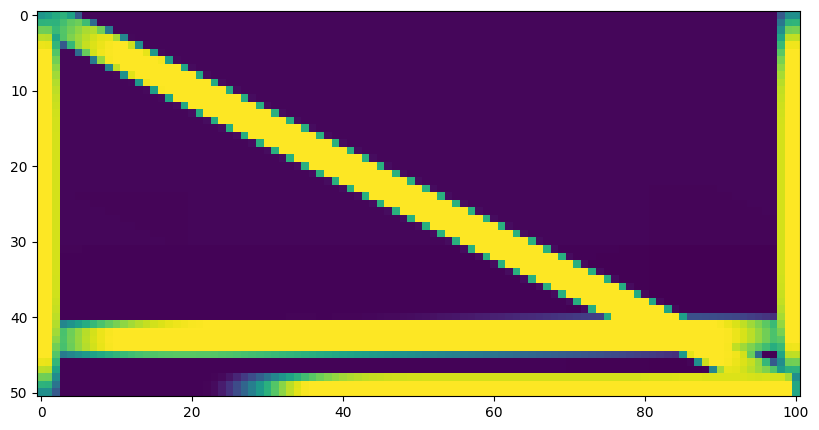

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(env.get_attr('H')[0].reshape((51,101),order='F'))